#Project Title: Regular Season Team Performance and SuperBowl Viewership

###Team Members:
Samantha Fischer: sfisch

Aurelia Hudak: arhudak

Caitlin O’Grady: ceogrady

###Overview
Does the performance of the two teams during the regular season have an impact on the television ratings during the super bowl?

We assess whether the regular season performance of the two Super Bowl teams of that year influences television ratings during the Super Bowl. We analyze the wins, losses, and margins of victory or defeat for the two teams during the regular season and examine if there is a correlation between this performance and the ratings/viewership of that year's Super Bowl.

###Motivation

With the most recent superbowl achieving a staggering 123.4 million viewers, which is the TV's biggest audience in U.S History, we were interested in potential factors that would have caused this increase in viewership. There are always some assumed factors as to what drives Super Bowl viewership, such as the rumored idea that there is in fact the 'NFL Script.' Even though this famed rumor was debunked by Forbes with the argument that "the level of collusion necessary to pull off a rigged game would be incredibly complex (Novak, 2024), many still perpetuate the idea. On top of this, celebrity attendance as well as the excitement surrounding Taylor Swift and Travis Kelce's relationship, has also been rumored to increase views by incorporating new fans, as Time Magazine describes (Reedy, 2024).

In the wake of all these speculations and talk surrounding what drives NFL and Super Bowl popularity and viewership, we were interested in focusing on finding a statistically backed reason as to what actually affects viewership. Is there some driving factor that can be traced beyond the pop-culture phenomena? We decided to focus on one potential factor: the team's in season record who participate in the Super Bowl.

1. What is the trend of viewership (TV ratings) of the Super Bowl?

By addressing this question, we can evaluate whether the trend of Super Bowl viewership has shown consistent growth or if it fluctuates from year to year. This insight will help us find the patterns in viewership (TV ratings), enabling us to anticipate potential outcomes if there is a correlation between viewership and team performance during the regular season. For instance, if there is a significant decline in viewership in a particular year, we can investigate whether there were any anomalies in the performance of the teams during that time.

2. How does a team's regular season performance affect the viewership of the Super Bowl?

While it's commonly understood that teams making it to the Super Bowl typically have a higher win-loss record compared to those that do not, we are particularly interested in analyzing the margin of victory for these teams. Addressing this question will enable us to evaluate whether Super Bowl's with teams that had very close seasons attract viewership versus Super Bowl's with teams that had very successful seasons.

3. How does the regular season performance of teams, characterized by more closely contested games versus those with significant margins of victory, correlate with attracting a larger audience?

This question will allow us to assess our overarching question, which is whether there exists a correlation between viewership and team performance. The earlier questions help us analyze the data separately to comprehend their individual behaviors. Here, we can examine the interaction between these variables and determine if this correlation is statistically significant.

Sources:
- Reedy, J. (2024, February 13). Super Bowl LVIII Is the Most Watched in History With 208 Million Viewers, NBC Says. Time. https://time.com/6694282/super-bowl-lviii-2024-most-watched-viewership-record/

- NFL Operations. (2024, February 13). Super Bowl LVIII is Most Watched Telecast in History. NFL Operations. https://operations.nfl.com/updates/the-game/super-bowl-lviii-is-most-watched-telecast-in-history/

- Novak, M. (2024, February 6). Viral Videos Capitalize on Conspiracy Theory That NFL Games Are Rigged. Forbes. https://www.forbes.com/sites/mattnovak/2024/02/06/viral-videos-capitalize-on-conspiracy-theory-that-nfl-games-are-rigged/?sh=275256fff41c

- Sports Media Watch. (n.d.). Super Bowl Ratings: Historical Viewership Chart. Retrieved from https://www.sportsmediawatch.com/super-bowl-ratings-historical-viewership-chart-cbs-nbc-fox-abc/

###Data Sources
####The sources of data that we'll be using:

https://www.kaggle.com/datasets/mattop/super-bowl-television-ratings

https://www.kaggle.com/datasets/timoboz/superbowl-history-1967-2020

https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023


####How the datasets complement each other:

The dataset “Super Bowl Television Ratings (1967 - 2021)” includes information on the ratings (viewership) of each Super Bowl from 1967 to 2021 and indicates which teams were playing in that Super Bowl. The data set “Super Bowl History 1967 - 2020” provides information on what teams were in the Super Bowl from 1967 to 2020 and the winner and loser of that game. The data set “NFL Team Data 2003-2023” provides the margin of victory for each team from the year 2003 to 2023. Each of these datasets share the same data for the names of the teams (in the Super Bowl and in the NFL in general).



###Data Description

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.formula.api as smf


In [ ]:
# Import data
ratings = pd.read_csv("super-bowl-ratings.csv")
sb_record = pd.read_csv("superbowl.csv")
team_stats = pd.read_csv("team_stats_2003_2023.csv")

# Display data
print("\nsuperbowl ratings dataset:\n")
display(ratings.head())
print("\nVariables of interest from ratings dataset:\nsuper_bowl_number\ndate\nnetwork\naverage_viewers\ntotal_viewers\nhousehold_rating\n")
print("\nsuperbowl record dataset:\n")
display(sb_record.head())
print("\nVariables of interest from sb_record dataset:\nDate\nSB\nWinner\nWinner Pts\nLoser\nLoser Pts\n")
print("\nregular season stats dataset:\n")
display(team_stats.head())
print("\nVariables of interest from team_stats dataset:\nyear\nteam\nwins\nlosses\nwin_loss_perc\npoints\npoints_opp\npoints_diff\nmov\n")


superbowl ratings dataset:



,super_bowl,super_bowl_number,date,network,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
0,I,1,1967-01-15,NBC,24430000,35600000.0,18.5,36,37500
1,II,2,1968-01-14,CBS,39120000,51300000.0,36.8,68,54500
2,III,3,1969-01-12,NBC,41660000,54500000.0,36.0,70,55000
3,IV,4,1970-01-11,CBS,44270000,59200000.0,39.4,69,78200
4,V,5,1971-01-17,NBC,46040000,58500000.0,39.9,75,72500



Variables of interest from ratings dataset:
super_bowl_number
date
network
average_viewers
total_viewers
household_rating


superbowl record dataset:



,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California



Variables of interest from sb_record dataset:
Date
SB
Winner
Winner Pts
Loser
Loser Pts


regular season stats dataset:



,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN



Variables of interest from team_stats dataset:
year
team
wins
losses
win_loss_perc
points
points_opp
points_diff
mov



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


As seen in the output above, the variables of interest from ratings dataset are super_bowl_number, data, network, average_viewers, total_viewers, and household_rating. From the sb_record dataset we are focusing on, Date, SB, Winner, Winner Pts, Loser, and Loser Pts. And finally, from the team_stats dataset we will look at year, team, wins, losses, win_loss_perc, points, points_opp, points_diff, and mov.

### Data Manipulation

In [ ]:
# Merging datasets, creating columns, and cleaning up duplicate columns

# Creating a column in ratings data frame that is for the year
# Ratings data set has information on years 1967-2021
ratings['date'] = pd.to_datetime(ratings['date'])
ratings['year'] = ratings['date'].dt.year

# Creating a column in superbowl record data frame for year
# Superbowl record dataset has information on years 1967-2020
def get_year(Date):
  date_li = Date.split(" ")
  return int(date_li[-1])
sb_record['year'] = sb_record['Date'].apply(get_year)


# Segmenting team_stats, super bowl record, and ratings only including necessary columns that we want to look at
team_stats_nec = team_stats[['team','year','wins','losses','win_loss_perc','mov']].copy()

sb_record_nec = sb_record[['year','Date', 'SB', 'Winner', 'Winner Pts', 'Loser', 'Loser Pts']].copy()

ratings_nec = ratings[['year', 'super_bowl_number', 'date', 'network', 'average_viewers', 'total_viewers', 'household_rating']].copy()


# Merge sb record db with regular season performance of losers
sb_record_final = pd.merge(sb_record_nec,team_stats_nec, left_on=["Loser", "year"], right_on=["team", "year"], how="left")

# Rename columns to be specific to losers
for col in ['team','wins','losses','win_loss_perc','mov']:
  sb_record_final.rename(columns={col: f"loser_{col}"}, inplace=True)

# Merge sb record with losers performance with regular season performance of winners
sb_record_final = pd.merge(sb_record_final,team_stats_nec, left_on=["Winner", "year"], right_on=["team", "year"], how="left")

# Rename columns to be specific to winners
for col in ['team','wins','losses','win_loss_perc','mov']:
  sb_record_final.rename(columns={col: f"winner_{col}"}, inplace=True)

# Merge sb record with winner and losers performance with the ratings
data = pd.merge(sb_record_final, ratings_nec, on='year', how='left')

# Dropping duplicate rows
data.drop(columns=['winner_team', 'loser_team', 'super_bowl_number', 'date'], inplace=True)


# Creating performance groupings of bad, mediocre, and good for both winners and losers of the superbowl
# Range of win_loss_perc = 0 -> 1
bins = [0,0.33,0.66,1]
data['winner_performance'] = pd.cut(data['winner_win_loss_perc'], bins=bins, labels=["bad","mediocre","good"])
data['loser_performance'] = pd.cut(data['loser_win_loss_perc'], bins=bins, labels=["bad","mediocre","good"])

# Renaming columns to replace spaces with underscores, and to make some column names lowercase (for continuity)
data.rename(columns={"Winner Pts":"winner_pts","Loser Pts":"loser_pts","Winner":"winner","Loser":"loser","Stadium":"stadium","City":"city","State":"state"}, inplace=True)


# Only including years 2023-2020 as the NFL data set only starts at 2023 leaving null values for the other years
data['year'] = pd.to_numeric(data['year'])
data = data[data['year'] >= 2003]

data.head(5)

,year,Date,SB,winner,winner_pts,loser,loser_pts,loser_wins,loser_losses,loser_win_loss_perc,...,winner_wins,winner_losses,winner_win_loss_perc,winner_mov,network,average_viewers,total_viewers,household_rating,winner_performance,loser_performance
0,2020,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,6.0,10.0,0.375,...,14.0,2.0,0.875,NaN,Fox,101320000,148500000.0,41.6,good,mediocre
1,2019,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,9.0,7.0,0.563,...,12.0,4.0,0.750,NaN,CBS,98480000,149000000.0,41.1,good,mediocre
2,2018,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,11.0,5.0,0.688,...,9.0,7.0,0.563,NaN,NBC,103470000,NaN,43.1,mediocre,good
3,2017,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,10.0,6.0,0.625,...,13.0,3.0,0.813,10.1,Fox,111320000,172000000.0,45.3,good,mediocre
4,2016,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,6.0,10.0,0.375,...,9.0,7.0,0.563,NaN,CBS,111860000,167000000.0,46.6,mediocre,mediocre


## Cleaned data frame column names and meanings:

- **year:** The year that the Super Bowl took place.
- **Date:** The entire date that the Super Bowl took place.
- **SB:** Super bowl number.
- **winner:** Winning team of the Super Bowl.
- **winner_pts:** The final score for the winning team.
- **loser:** The losing team of the Super Bowl.
- **loser_pts:** The final score for the losing team.
- **loser_wins:** Wins during the regular season for the losing team.
- **loser_losses:** Losses during the regular season for the losing team.
- **loser_win_loss_perc:** The win/loss percentage for the losing team.
- **loser_mov:** The average margin of victory for the losing team during regular season.
- **winner_wins:** Wins during the regular season for the winning team.
- **winner_losses:** Losses during the regular season for the winning team.
- **winner_win_loss_perc:** The win/loss percentage for the winning team.
- **winner_mov:** The average margin of victory for the winning team during regular season.
- **network:** The network the Super Bowl was broadcast on.
- **average_viewers:** The average viewers each year for the Super Bowl.
- **total_viewers:** The total viewers that year for the Super Bowl.
- **household_rating:** House hold rating for the Super Bowl.
- **winner_performance:** Created column to categorize the winner's win/loss percentage over the season as either bad, mediocre, or good.
- **loser_performance:** Created column to categorize the loser's win/loss percentage over the season as either bad, mediocre, or good.

### Visualizations

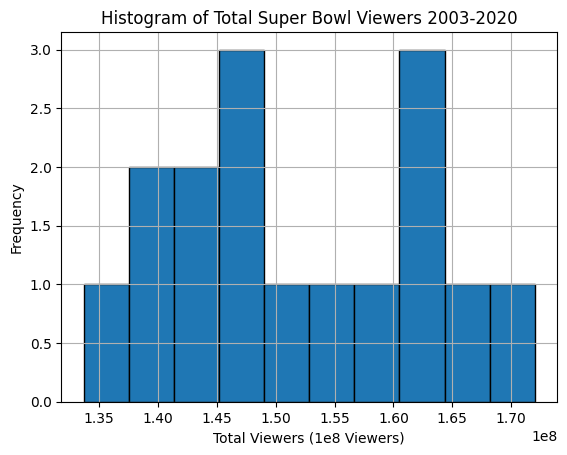

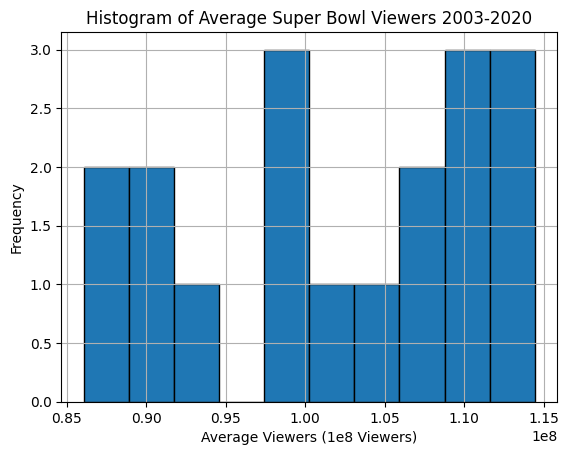

In [ ]:
# Histogram of total viewership (2003 - 2020)
total_viewers = 'total_viewers'
data[total_viewers] = data['total_viewers']
data[total_viewers].hist(bins = 10, edgecolor = 'black')
plt.xlabel('Total Viewers (1e8 Viewers)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Super Bowl Viewers 2003-2020')
plt.show()

# Histogram of average viewership (2003 - 2020)
avg_viewers = 'average_viewers'
data[avg_viewers] = data['average_viewers']
data[avg_viewers].hist(bins = 10, edgecolor = 'black')
plt.xlabel('Average Viewers (1e8 Viewers)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Super Bowl Viewers 2003-2020')
plt.show()

The histograms above depict the total Super Bowl viewers and the average Super Bowl viewers from the years 2003 to 2020. As seen above, these two distributions appear to be possibly be bi-modal with a few outliers present in the set.

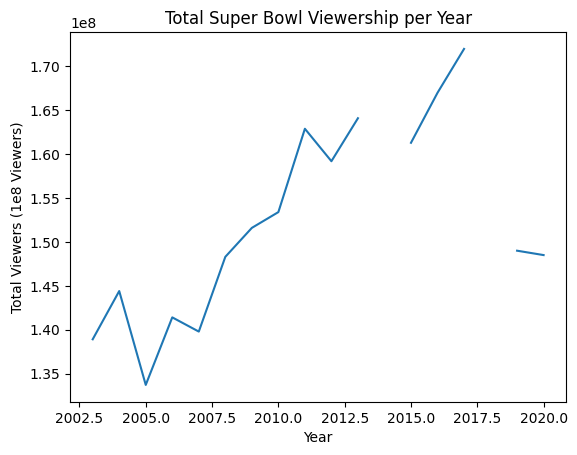

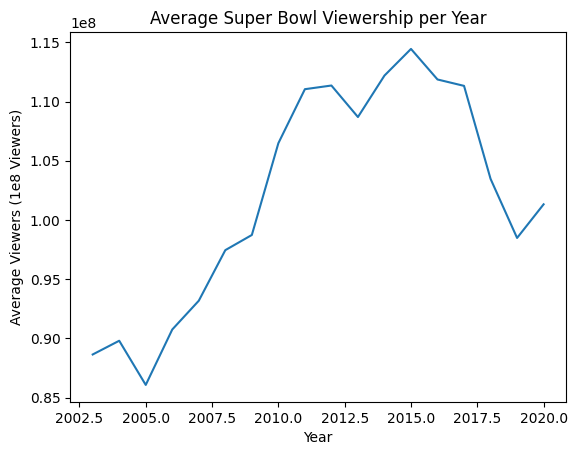

In [ ]:
# Line plot of total viewership (2003 - 2020)
data.groupby('year')['total_viewers'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Total Viewers (1e8 Viewers)')
plt.title('Total Super Bowl Viewership per Year')
plt.show()

# Line plot of average viewership (2003 - 2020)
data.groupby('year')['average_viewers'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Viewers (1e8 Viewers)')
plt.title('Average Super Bowl Viewership per Year')
plt.show()

Looking at the line graphs above, we can see that Super Bowl viewership fluctuates over time. This is important to show that the viewership hasn't been steady, which would've indicated there may not be factors affecting overall views, however we can see that is not the case. Looking specifically at the average viewership, while there was a steady increase from 2005 to around 2012, there were fluctuations in viewership amounts and eventually a decrease from 2015 to 2018. After this, viewership began rising once again, and as we have found from our research, 2024's Super Bowl was the most watched yet.

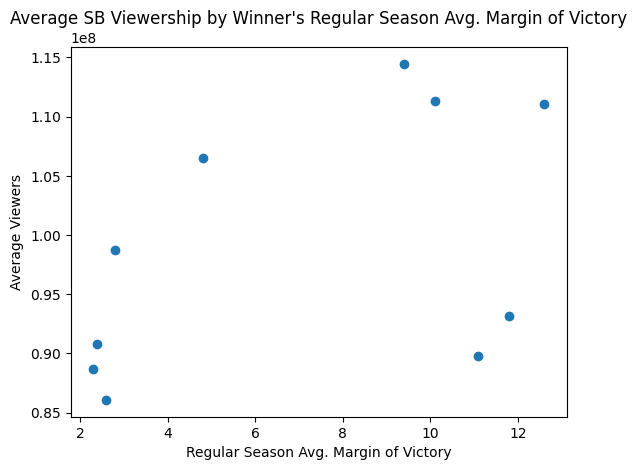

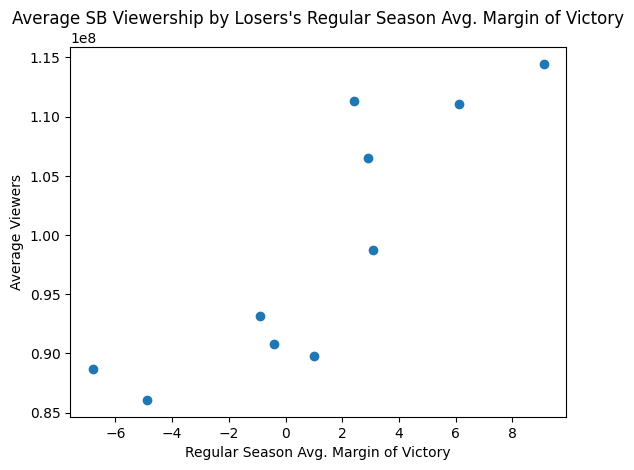

In [ ]:
# Scatterplot of average super bowl viewership compared by winner's and loser's margin of victory
x = data['winner_mov']
y = data['average_viewers']

plt.scatter(x,y)
plt.title("Average SB Viewership by Winner's Regular Season Avg. Margin of Victory")
plt.xlabel("Regular Season Avg. Margin of Victory")
plt.ylabel("Average Viewers")
plt.show()

x = data['loser_mov']
y = data['average_viewers']

plt.scatter(x,y)
plt.title("Average SB Viewership by Losers's Regular Season Avg. Margin of Victory")
plt.xlabel("Regular Season Avg. Margin of Victory")
plt.ylabel("Average Viewers")
plt.show()

As seen in the two scatterplots above, there appears to be a weak positive trend in the data, more so in the second scatterplot showing that as the margin of victory increases, the average viewership increases as well, especially for teams that lost the Super Bowl. This relationship is something we hope to explore further.

## Data Manipulation & Analysis

### Descriptive Statistics

In [ ]:
# Printing summary stats for the final combined data set
data_summary = data.describe()

print(f"Summary of the dataset\n\ndata:\n{data_summary}")

Summary of the dataset

data:
              year  winner_pts  loser_pts  loser_wins  loser_losses  \
count    18.000000   18.000000  18.000000   18.000000     18.000000   
mean   2011.500000   29.388889  19.500000    9.111111      6.888889   
std       5.338539    8.918843   8.326075    2.517910      2.517910   
min    2003.000000   13.000000   3.000000    4.000000      4.000000   
25%    2007.250000   24.000000  14.750000    7.000000      5.000000   
50%    2011.500000   30.000000  20.500000   10.000000      6.000000   
75%    2015.750000   33.500000  24.750000   11.000000      9.000000   
max    2020.000000   48.000000  33.000000   12.000000     12.000000   

       loser_win_loss_perc  loser_mov  winner_wins  winner_losses  \
count            18.000000  10.000000    18.000000      18.000000   
mean              0.569611   1.160000    10.944444       5.055556   
std               0.157362   4.744166     2.388015       2.388015   
min               0.250000  -6.800000     7.000000    

According to the summary of the Super Bowl data, the mean household rating is 43.8, with a minimum of 40.7 and a max of 47.5. So, the Super Bowl ratings for this data set seem to concentrate under 50, and there isn't a very large range with a value of 6.8 for the rating. Looking specifically to the winning and losing team stats that went to the Super Bowl, the average points for the winning team is 29.4 and the average points for the losing team is 19.5. The minimums, respectively, are 13 and 3, and the maximums are 48 and 33. Finally, focusing on the team specific data, due to the large amount of data, the preliminary summary of the data is not very telling. The average number of wins is betwwn 9 and 10, while for losses is it between 5 and 7, and the average win loss percentage is around 0.6 for both the winning teams and the losing teams. For the margin of victory, the losing teams' range falls slightly negative with a mean of 1, while the winning teams' range is constantly positive with a mean of around 7. Descriptives for year are included overall which provide a good overview and glimpse at what the data includes, however we are not performing any specific analysis on the year.

### Inferential Statistics

,sum_sq,df,F,PR(>F)
winner_performance,1.871795e+17,2.0,1032.666191,1.219631e-17
Residual,1.450068e+15,16.0,NaN,NaN


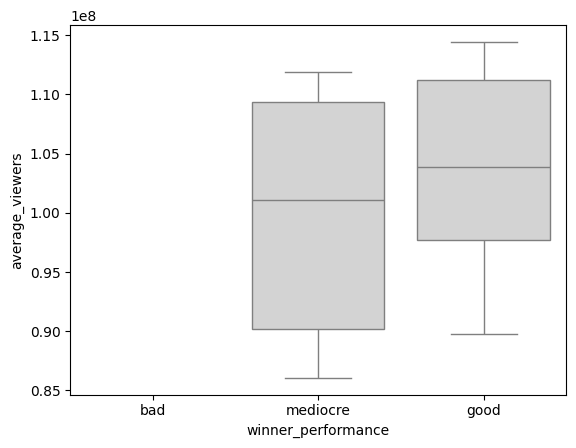

In [ ]:
# Creating box plots for each category of loser performance
sns.boxplot(x="winner_performance",y="average_viewers", data=data, color = "lightgray")

# Performing Type 2 ANOVA
winner_lm = ols('average_viewers ~ winner_performance', data=data).fit()
table = sm.stats.anova_lm(winner_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
loser_performance,3.859753e+14,2.0,2.578911,0.108983
Residual,1.122495e+15,15.0,NaN,NaN


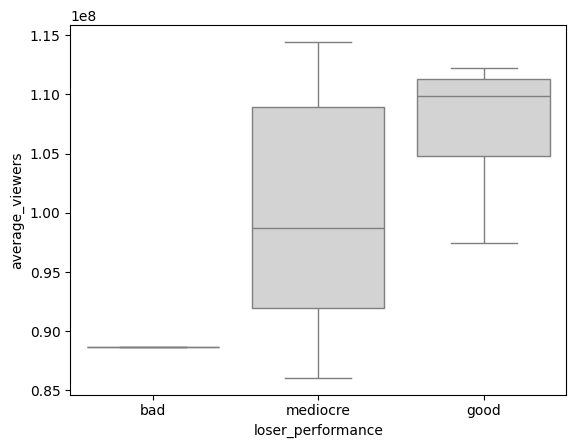

In [ ]:
# Creating box plots for each category of loser performance
sns.boxplot(x="loser_performance",y="average_viewers", data=data, color = "lightgray")

# Performing Type 2 ANOVA
loser_lm = ols('average_viewers ~ loser_performance', data=data).fit()
table = sm.stats.anova_lm(loser_lm, typ=2)
table

As data above appears normally distributed, we can interpret the outcomes from the ANOVA. We are comparing the average viewership based on the performance of winners and losers. To do this, we conducted two separate ANOVA tests: one for winner performance and one for loser performance. We used the criteria below:

Null Hypothesis (H0): There is no significant difference in average viewership among different levels of winner or loser performance.

Alternative Hypothesis (H1): There is a significant difference in average viewership among different levels of winner or loser performance.

We chose a significance level of 0.05. This 5% chance of incorrectly rejecting the null hypothesis is suitable for this dataset and ANOVA test fot these reasons: while the risks associated with obtaining a false positive are low (a significance of 0.01, for example, would be best when the consequences of obtaining a false positive are severe), we also want the test to be sensitive enough to minimize false positives without disregarding potential results.
Thus, we determined that a significance level of 0.05 would be appropriate for this test.

Type 2 ANOVA: This type of ANOVA takes into account the interaction effects between factors. In this case, different levels of winner/loser performance interact with each other, making the Type 2 ANOVA more suitable.



The ANOVA analysis reveals that winner_performance significantly affects average viewership. The sum of squares for winner_performance is 1.871795 × 10^17 with 2 degrees of freedom, yielding an F-statistic of 1032.666191 and an extremely low p-value of 1.219631 × 10^−17, indicating a significant difference in average viewership across winner_performance levels.

For loser_performance, the sum of squares is 3.859753 × 10^14 with 2 degrees of freeedom with a high p-value of 0.108983, which is greater than the significance level of 0.05. We fail to reject the null hypothesis. This suggests that there is no significant difference in average viewership among different levels of loser performance.

In summary, while winner_performance significantly influences average viewership, loser_performance does not seem to have a significant effect on average viewership, based on these results.

### Comparative Analysis

In [ ]:
# Running OLS Regression for Winner Performance and average viewership
model = smf.ols('average_viewers ~ winner_performance', data=data).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        average_viewers   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.6444
Date:                Wed, 20 Mar 2024   Prob (F-statistic):              0.434
Time:                        16:35:49   Log-Likelihood:                -313.72
No. Observations:                  18   AIC:                             631.4
Df Residuals:                      16   BIC:                             633.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       6.784e+07   1.51e+06     45.068      0.000    6.46e+07     7.1e+07
winner_performance[T.mediocre]  3.211e+07   2.46e+06     13.062      0.000    2.69e+07    3.73e+07
winner_performance[T.good]      3.573e+07    2.3e+06     15.540      0.000    3.09e+07    4.06e+07
==============================================================================
Omnibus:                        6.200   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                1.696
Skew:                          -0.175   Prob(JB):                        0.428
Kurtosis:                       1.537   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Running OLS Regression for Loser Performance and average viewership
mode2 = smf.ols('average_viewers ~ loser_performance', data=data).fit()
mode2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        average_viewers   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.579
Date:                Wed, 20 Mar 2024   Prob (F-statistic):              0.109
Time:                        16:35:49   Log-Likelihood:                -311.42
No. Observations:                  18   AIC:                             628.8
Df Residuals:                      15   BIC:                             631.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.864e+07   8.65e+06     10.247      0.000    7.02e+07    1.07e+08
loser_performance[T.mediocre]  1.158e+07   9.04e+06      1.282      0.219   -7.68e+06    3.08e+07
loser_performance[T.good]      1.872e+07   9.34e+06      2.004      0.063   -1.19e+06    3.86e+07
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.566
Skew:                           0.010   Prob(JB):                        0.754
Kurtosis:                       2.132   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall, the OLS Regressions are statistically significant for some categories, but not others. For loser performance, the OLS for both "mediocre" and "good" are not statistically significant. However for the winner's perfomance is statistically significant both for teams that had "mediocre" and "good" performance. While significant, the winner_performance does only explain 3.9% of the variation in the average_viewership for the Super Bowl.

The R-squared values differ between the two models. The model with winner performance as the independent variable has a lower R-squared value (0.039) compared to the model with loser performance (0.256). This means that the loser performance model accounts for a larger proportion of the differences in average viewership (among the observed data) compared to the winner performance model.

The winner performance model suggests that both mediocre and good performances significantly influence average viewership. The loser performance model indicates that only the good performance of the loser has a marginally significant effect on average viewership.


#### Multivariate Analysis

In [ ]:
# Viewing winner performance per team in a pivot table
data.head()
pd.crosstab(index=data['winner'], columns=data['winner_performance'], values=data['winner_pts'], aggfunc='mean')


winner_performance,mediocre,good
winner,,
Baltimore Ravens,34.0,NaN
Denver Broncos,24.0,NaN
Green Bay Packers,NaN,31.00
Indianapolis Colts,NaN,29.00
Kansas City Chiefs,NaN,31.00
New England Patriots,24.0,26.75
New Orleans Saints,NaN,31.00
New York Giants,21.0,17.00
Philadelphia Eagles,41.0,NaN


In [ ]:
#pivot table, comparing winner and loser performance by the mean household rating
table = pd.pivot_table(data, values='household_rating', index=['winner_performance', 'loser_performance'], aggfunc="mean")
table

household_rating
winner_performance loser_performance                  
mediocre           bad                       40.700000
                   mediocre                  42.825000
                   good                      45.500000
good               mediocre                  43.500000
                   good                      45.266667

Winner Performance vs. Mean Household Rating by Winner and Loser Performance:
This table showcases the mean household ratings based on combinations of winner and loser performances. Notably, it shows that higher-rated performances, both from winners and losers, tend to correlate with higher household ratings. For example, combinations where both the winner and loser performances are categorized as "good" generally yield higher mean household ratings compared to combinations involving "mediocre" or "bad" performances.

Winner Performance vs. Mean Points Scored:
This pivot table presents the average points scored by winners categorized as "mediocre" and "good" performers for each team. It highlights the teams' performance based on the average points scored in different performance categories.Teams like the Tampa Bay Buccaneers and the Philadelphia Eagles tend to score points and are categorized as "mediocre." Meanwhile, teams like the Seattle Seahawks and the New England Patriots fall in the "good" category.

In summary, these findings suggest a correlation between team performance (winner performance) and both mean household ratings and points scored. Teams with better performance tend to achieve higher ratings and score more points.


## Synthesis

Based on the descriptive statistics, inferential statistics, and graphical analyses conducted, we can synthesize the findings to answer our research questions:

Trend of viewership (TV ratings) of the Super Bowl:

The trend of viewership (TV ratings) of the Super Bowl shows variability across different Super Bowls (different years and different teams competing). Descriptive statistics reveal that the average household rating for Super Bowl events ranges from 18.5 to 49.1, with a mean of 42.9.  

Effect of a team's regular season performance on Super Bowl viewership:

Inferential statistics, specifically the analysis of winner performance using ANOVA, suggest that a winning team's regular season performance, as categorized by winner performance, significantly influences Super Bowl viewership. Teams with "mediocre" or "good" regular season performances tend to attract higher average viewership compared to teams with poorer regular season performances. The OLS regression analysis also confirms the significance of winner performance in explaining variations in average viewership. Finally, these findigns are also supported by the pivot tables, which suggest a correlation between team performance (winner performance) and both mean household ratings and points scored. Teams with stronger regular season performances tend to attract larger audiences during the Super Bowl, as reflected in higher average viewership.







Without combining the datasets that we chose for our analysis, we would not be able to understand how team performance affects viewership. Each of the three datasets that we used in our analysis had different aspects that were equally necessary and important to drawing our conclusions above. The ratings dataset allowed us to gather data about average and total Super Bowl viewership, however this dataset was missing the key connecting information about what teams went to the Super Bowl and what their season performance was like. We were able to collect data about what teams went to the Super Bowl, the date of the Super Bowl, the number and so on from the sb_record dataset. Then we just had one piece of key information left, the team performance. We collected information on performance as margin of victory and win loss percentage from the team_stats dataset.


## Reflection

Overall, we were able to successfully run several analytical tests that we believe provide a good overview on the relationships founds in our dataset. Some areas of difficulty were deciding which test is necessary, have we succesfully met all requirements for that test, and how best to visually show the data.

Some of the results we found are not as aligned with what we had originally thought might be the outcome. We found that in season performance for the teams that lost the Super Bowl did not impact the viewership. This is especially interesting that only the winning team's performance impacted the viewership of the superbowl, instead of both teams. With some further research, it appears that "After 56 Super Bowl, more games have been blowouts — in this case won by 17 points or more — than have been close games have — won by four points or less" (Walters, 2023). This could possibly explain that fans are only interested in watching the Super Bowl for the team that might be favored to win as in more recent years the match ups have not been as close resulting in more blowouts.

This is definitely something we would wish to explore futher or improve our previous analysis to find answers to.

Source: Walters, T. (2023, February 8). The Super Bowl has seen way more blowouts than close games. Here's a breakdown. The Florida Times-Union. https://www.jacksonville.com/story/sports/nfl/2023/02/08/super-bowl-has-seen-20-blowouts-and-14-close-games-heres-our-list/69886361007/

### Converting to html

In [ ]:
%%shell
jupyter nbconvert --to html /content/SI618Project.ipynb

[NbConvertApp] Converting notebook /content/SI618Project.ipynb to html
[NbConvertApp] Writing 1021895 bytes to /content/SI618Project.html
